# W14 Heart Disease Analysis

Trisha Alexis Likorawung 
0706022110037

In [6]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [7]:
import urllib.request
import ssl

# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

In [17]:
url = "https://raw.githubusercontent.com/Trsh16/heart/main/heart.csv"
df = pd.read_csv(url)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Preparation / Cleaning

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [19]:
df.rename(columns={'output': 'target'}, inplace=True)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

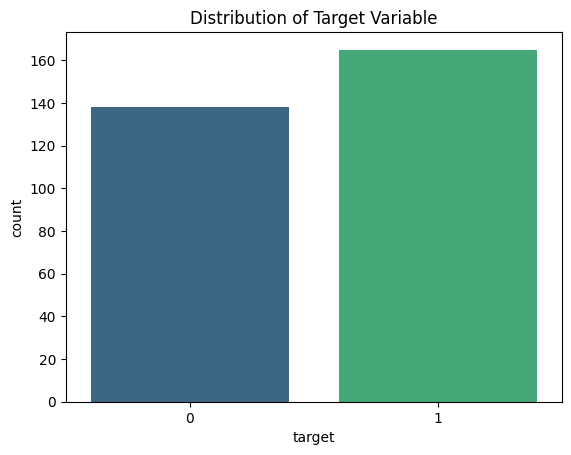

In [47]:
sns.countplot(x='target', data=df, palette='viridis', hue='target', legend = False)
plt.title('Distribution of Target Variable')
plt.show()

Distribution of target variables = There are more chance of heart attack than less chance of heart attack because there are 140 people that got 0 and > 160 people that got 1

# Compare two different variables

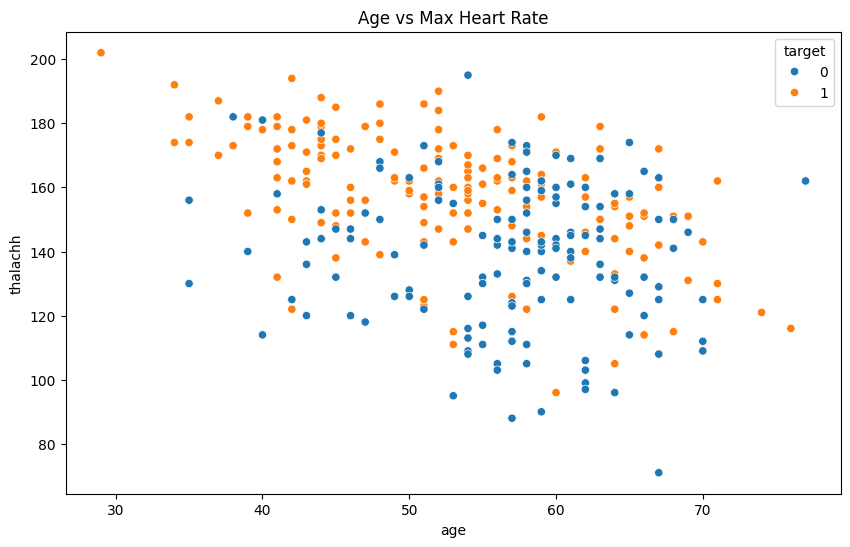

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalachh', hue='target', data=df)
plt.title('Age vs Max Heart Rate')
plt.show()

Age versus Max Heart Rate = The analysis of age versus maximum heart rate suggests that there is no significant correlation with the target output. The presence or absence of heart disease does not appear to be strongly associated with either age or maximum heart rate, as the outcomes seem more random.

/var/folders/7c/s3y2htjx2xjcmxy9pjc1r_pr0000gp/T/ipykernel_1377/2279270598.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == 0]["age"], color='green', kde=True)
/var/folders/7c/s3y2htjx2xjcmxy9pjc1r_pr0000gp/T/ipykernel_1377/2279270598.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

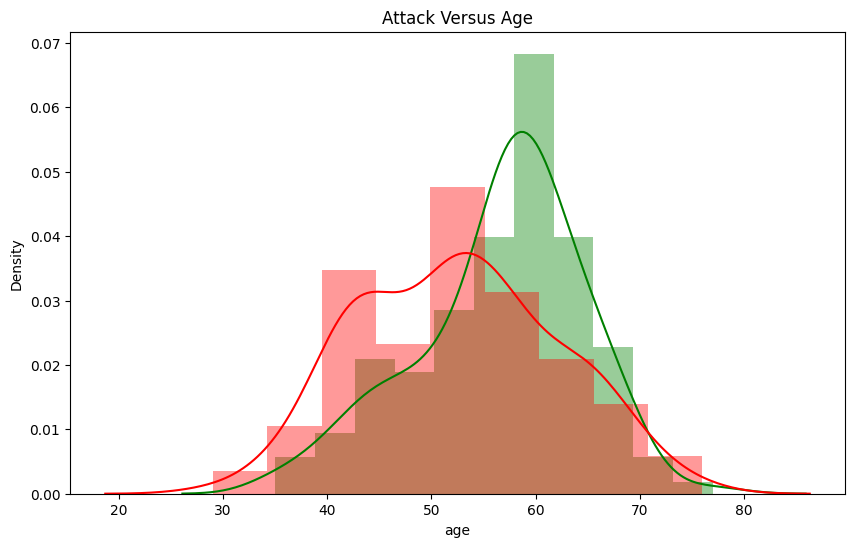

In [74]:
plt.figure(figsize=(10, 6))

sns.distplot(df[df['target'] == 0]["age"], color='green', kde=True)
sns.distplot(df[df['target'] == 1]["age"], color='red', kde=True)

plt.title("Attack Versus Age")
plt.show()

The attack versus age = The result is the age and possible chance of heart attack does not correlate, because the older the person do not mean higher chance of heart attack. It,s more random anyone can get it.

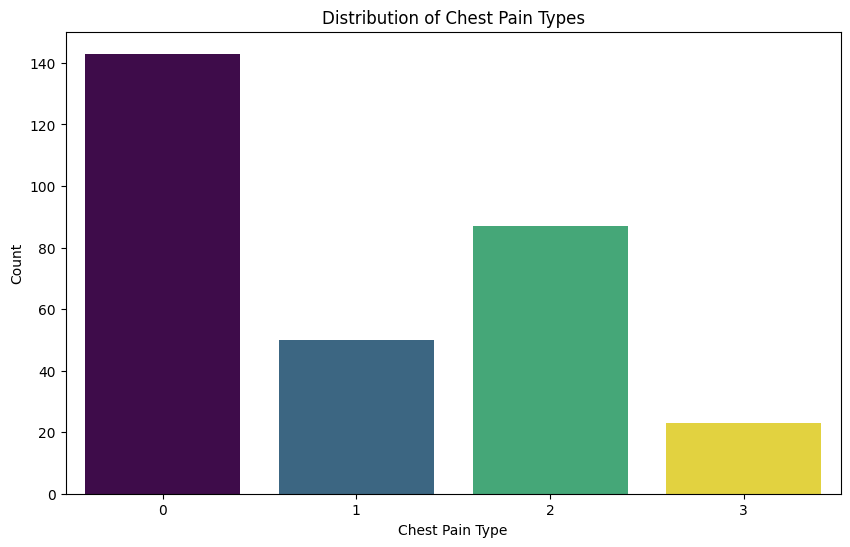

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='cp', data=df, palette='viridis', legend = False)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types')
plt.show()

Distribution of chest pain types = It can be observed people have chest pain of type 0 i.e "Typical Angina" is the highest, It can be observed people have chest pain of type 3 i.e "Asympthomatic" is the lowest, and lastly, it can also be observed people with chest pain of type 0 is almost 50% of all the people.

# Data Preparation for Analysis

In [60]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc:.4f}')
    print(f'Classification Report for {name}:\n{classification_report(y_test, y_pred)}')
    print(f'Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}')
    print('='*50)

Logistic Regression Accuracy: 0.8525
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix for Logistic Regression:
[[25  4]
 [ 5 27]]
K-Nearest Neighbor Accuracy: 0.9016
Classification Report for K-Nearest Neighbor:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix for K-Nearest Neighbor:
[[27  2]
 [ 4 28]]
XGBoost Accuracy: 0.8197
Classification Report for XGBoost:

# Short conclusion about the modeling results
Based on the provided classification results for Logistic Regression, K-Nearest Neighbor, and XGBoost models:

1. **Logistic Regression:**
   - **Accuracy:** 85.25%
   - **Precision:** 83% for class 0, 87% for class 1
   - **Recall:** 86% for class 0, 84% for class 1
   - **F1-Score:** 85% for both classes
   - The confusion matrix shows 25 true negatives, 27 true positives, 4 false positives, and 5 false negatives.

2. **K-Nearest Neighbor:**
   - **Accuracy:** 90.16%
   - **Precision:** 87% for class 0, 93% for class 1
   - **Recall:** 93% for class 0, 88% for class 1
   - **F1-Score:** 90% for both classes
   - The confusion matrix shows 27 true negatives, 28 true positives, 2 false positives, and 4 false negatives.

3. **XGBoost:**
   - **Accuracy:** 86.89%
   - **Precision:** 86% for class 0, 86% for class 1
   - **Recall:** 86% for class 0, 78% for class 1
   - **F1-Score:** 86% for class 0, 82% for class 1
   - The confusion matrix shows 25 true negatives, 25 true positives, 4 false positives, and 7 false negatives.

**Conclusion:**
- All three models demonstrate good accuracy in predicting the likelihood of heart disease.
- K-Nearest Neighbor has the highest accuracy among the three models, achieving 90.16% accuracy.